In [4]:
from obspy.core import read
from obspy.signal.trigger import ar_pick
import glob, os
import numpy as np
import pandas as pd
from obspy.imaging.cm import obspy_sequential
from obspy.signal.tf_misfit import cwt
from scipy.fftpack import fft, ifft
import datetime
import matplotlib.pyplot as plt

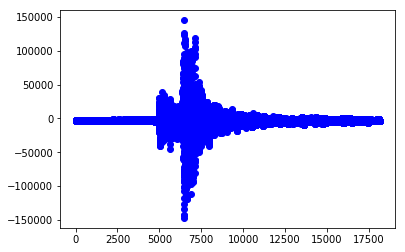

(18160,)


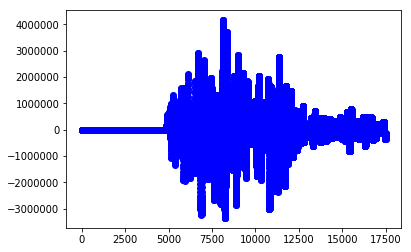

(17520,)


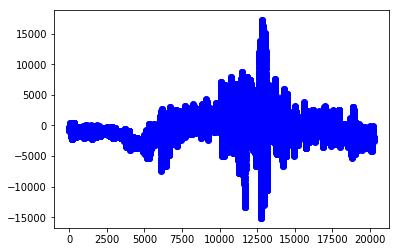

(20240,)


KeyboardInterrupt: 

In [48]:
os.chdir("/Users/Nishita/Documents/cs298/data/newearthquake")
listarr= []
for file in glob.glob("*"):
    #BHZfile = "/data/2014-08-19-ml56-oklahoma/" + file[0:-4]
    #print(file)
    st = read(file)
        #tr_bhz1 = read(BHZfile + "*.BHZ",starttime=tr_bhz[0].stats.starttime+min1,endtime=tr_bhz[0].stats.starttime+max1)
    
    
    
    tr = st[0]
    npts = tr.stats.npts
    dt = tr.stats.delta
    
    ti=tr.stats.starttime   
    ti_unix=float(ti.strftime("%s.%f"))
    time_submission=float(datetime.datetime.fromtimestamp(ti_unix+8*3600+673.21).strftime('%Y%m%d%H%M%S.%f'))

    et=tr.stats.endtime   
    et_unix=float(et.strftime("%s.%f"))
    endtime_submission=float(datetime.datetime.fromtimestamp(et_unix+8*3600+673.21).strftime('%Y%m%d%H%M%S.%f'))

    
    t = np.linspace(0, dt * npts, npts)
    f_min = 1
    f_max = 50

    
    arr=tr.data
    plt.scatter(list(range(0,len(arr))),arr, color='blue', label='Earthquake')
    plt.show()
   
    #print(sp)
    print(arr.shape)
    #listarr.append(ct,arr,1)
    channel=tr.stats.channel
    if(channel == "BHE"):
        channel = 1
    elif(channel == "BHN"):
        channel = 2
    elif(channel == "BHZ"):
        channel = 3
  
    listarr.append({'channel': channel,'starttime':time_submission,'endtime':endtime_submission,'delta':tr.stats.delta,'npts':tr.stats.npts, 'tsa': np.asarray(arr), 'label':1 })


In [3]:
df=pd.DataFrame(listarr)

In [11]:
df

,channel,delta,endtime,label,npts,starttime,tsa
0,1,0.025,2.014031e+13,1,18160,2.014031e+13,"[-2560.0, -3160.0, -2828.0, -2836.0, -3032.0, ..."
1,1,0.025,2.014082e+13,1,17520,2.014082e+13,"[-1989.0, -1797.0, -1449.0, -1982.0, -1960.0, ..."
2,1,0.025,2.014120e+13,1,20240,2.014120e+13,"[-835.0, -448.0, -662.0, -817.0, -524.0, -669...."
3,1,0.025,2.014120e+13,1,18680,2.014120e+13,"[2243.0, 2387.0, 2089.0, 2176.0, 2454.0, 2067...."
4,2,0.025,2.014031e+13,1,18160,2.014031e+13,"[100.0, -357.0, -111.0, -174.0, -152.0, -156.0..."
5,2,0.025,2.014082e+13,1,17520,2.014082e+13,"[1669.0, 1556.0, 1607.0, 1670.0, 1535.0, 1617...."
6,2,0.025,2.014120e+13,1,20240,2.014120e+13,"[2443.0, 2636.0, 2433.0, 2625.0, 2615.0, 2583...."
7,2,0.025,2.014120e+13,1,18680,2.014120e+13,"[731.0, 883.0, 496.0, 623.0, 788.0, 501.0, 578..."
8,3,0.025,2.014031e+13,1,18160,2.014031e+13,"[-5962.0, -6062.0, -6086.0, -5896.0, -5896.0, ..."
9,3,0.025,2.014082e+13,1,17520,2.014082e+13,"[3419.0, 3463.0, 3673.0, 3564.0, 3507.0, 3626...."


In [12]:
df=df.replace('BH1', 1)
df=df.replace('BH2', 2)
df=df.replace('BH3', 3)

/anaconda3/lib/python3.6/site-packages/pandas/core/missing.py:50: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


In [13]:
df

,channel,delta,endtime,label,npts,starttime,tsa
0,1,0.025,2.014031e+13,1,18160,2.014031e+13,"[-2560.0, -3160.0, -2828.0, -2836.0, -3032.0, ..."
1,1,0.025,2.014082e+13,1,17520,2.014082e+13,"[-1989.0, -1797.0, -1449.0, -1982.0, -1960.0, ..."
2,1,0.025,2.014120e+13,1,20240,2.014120e+13,"[-835.0, -448.0, -662.0, -817.0, -524.0, -669...."
3,1,0.025,2.014120e+13,1,18680,2.014120e+13,"[2243.0, 2387.0, 2089.0, 2176.0, 2454.0, 2067...."
4,2,0.025,2.014031e+13,1,18160,2.014031e+13,"[100.0, -357.0, -111.0, -174.0, -152.0, -156.0..."
5,2,0.025,2.014082e+13,1,17520,2.014082e+13,"[1669.0, 1556.0, 1607.0, 1670.0, 1535.0, 1617...."
6,2,0.025,2.014120e+13,1,20240,2.014120e+13,"[2443.0, 2636.0, 2433.0, 2625.0, 2615.0, 2583...."
7,2,0.025,2.014120e+13,1,18680,2.014120e+13,"[731.0, 883.0, 496.0, 623.0, 788.0, 501.0, 578..."
8,3,0.025,2.014031e+13,1,18160,2.014031e+13,"[-5962.0, -6062.0, -6086.0, -5896.0, -5896.0, ..."
9,3,0.025,2.014082e+13,1,17520,2.014082e+13,"[3419.0, 3463.0, 3673.0, 3564.0, 3507.0, 3626...."


In [7]:
count=0
os.chdir("/Volumes/HD-B1/Earthquake Sac Data/before")
for file in glob.glob("*.BHN"):
    #BHZfile = "/Volumes/HD-B1/Earthquake Sac Data/before" + file[0:-4]
    #print(file)
    min=0
    max=300
    tempr=read(file)
    print(file)
   
    while (max < 1380):
        tr = read(file,starttime=tempr[0].stats.starttime+min,endtime=tempr[0].stats.starttime+max)
            #tr_bhz1 = read(BHZfile + "*.BHZ",starttime=tr_bhz[0].stats.starttime+min1,endtime=tr_bhz[0].stats.starttime+max1)
        #arr=tr[0].data
        #tr.plot()
        newfilename="/Users/Nishita/Documents/cs298/data/before/"+file+str(min)
        tr.write(newfilename,format="SAC") 
        min=min+300
        max=max+300
    
    

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/HD-B1/Earthquake Sac Data/before'

In [14]:
os.chdir("/Users/Nishita/Documents/cs298/data/before")
listarr1= []
for file in glob.glob("*"):
    #BHZfile = "/data/2014-08-19-ml56-oklahoma/" + file[0:-4]
    #print(file)
    st = read(file)
        #tr_bhz1 = read(BHZfile + "*.BHZ",starttime=tr_bhz[0].stats.starttime+min1,endtime=tr_bhz[0].stats.starttime+max1)
    tr = st[0]
    npts = tr.stats.npts
    dt = tr.stats.delta
    
    ti=tr.stats.starttime   
    ti_unix=float(ti.strftime("%s.%f"))
    time_submission=float(datetime.datetime.fromtimestamp(ti_unix+8*3600+673.21).strftime('%Y%m%d%H%M%S.%f'))

    et=tr.stats.endtime   
    et_unix=float(et.strftime("%s.%f"))
    endtime_submission=float(datetime.datetime.fromtimestamp(et_unix+8*3600+673.21).strftime('%Y%m%d%H%M%S.%f'))

    
    t = np.linspace(0, dt * npts, npts)
    f_min = 1
    f_max = 50

    
    
    arr=tr.data
    
    #print(arr)
    print(arr.shape)
    #listarr.append(ct,arr,1)
    channel=tr.stats.channel
    if(channel == "BHE"):
        channel = 1
    elif(channel == "BHN"):
        channel = 2
    elif(channel == "BHZ"):
        channel = 3
        
    listarr1.append({'channel': channel,'starttime':time_submission,'endtime':endtime_submission,'delta':tr.stats.delta,'npts':tr.stats.npts, 'tsa': np.asarray(arr), 'label':0 })
    

(17520,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(30001,)
(

In [15]:
df1=pd.DataFrame(listarr1)

In [16]:
df1

,channel,delta,endtime,label,npts,starttime,tsa
0,1,0.025,2.014082e+13,0,17520,2.014082e+13,"[-1989.0, -1797.0, -1449.0, -1982.0, -1960.0, ..."
1,2,0.010,2.008041e+13,0,30001,2.008041e+13,"[-97.0, -72.0, -39.0, -9.0, 29.0, 75.0, 70.0, ..."
2,1,0.010,2.008040e+13,0,30001,2.008040e+13,"[-346.0, -328.0, -251.0, -139.0, -73.0, -82.0,..."
3,1,0.010,2.008040e+13,0,30001,2.008040e+13,"[-148.0, -106.0, -112.0, -196.0, -257.0, -245...."
4,1,0.010,2.008040e+13,0,30001,2.008040e+13,"[-133.0, -189.0, -223.0, -188.0, -102.0, -70.0..."
5,1,0.010,2.008040e+13,0,30001,2.008040e+13,"[-250.0, -320.0, -582.0, -823.0, -856.0, -769...."
6,2,0.010,2.008040e+13,0,30001,2.008040e+13,"[178.0, 206.0, 156.0, 94.0, 47.0, 17.0, 0.0, -..."
7,2,0.010,2.008040e+13,0,30001,2.008040e+13,"[58.0, 84.0, 33.0, -54.0, -111.0, -134.0, -87...."
8,2,0.010,2.008040e+13,0,30001,2.008040e+13,"[-229.0, -275.0, -289.0, -292.0, -244.0, -174...."
9,2,0.010,2.008040e+13,0,30001,2.008040e+13,"[189.0, 190.0, 156.0, 137.0, 72.0, -54.0, -111..."


In [17]:
df1

,channel,delta,endtime,label,npts,starttime,tsa
0,1,0.025,2.014082e+13,0,17520,2.014082e+13,"[-1989.0, -1797.0, -1449.0, -1982.0, -1960.0, ..."
1,2,0.010,2.008041e+13,0,30001,2.008041e+13,"[-97.0, -72.0, -39.0, -9.0, 29.0, 75.0, 70.0, ..."
2,1,0.010,2.008040e+13,0,30001,2.008040e+13,"[-346.0, -328.0, -251.0, -139.0, -73.0, -82.0,..."
3,1,0.010,2.008040e+13,0,30001,2.008040e+13,"[-148.0, -106.0, -112.0, -196.0, -257.0, -245...."
4,1,0.010,2.008040e+13,0,30001,2.008040e+13,"[-133.0, -189.0, -223.0, -188.0, -102.0, -70.0..."
5,1,0.010,2.008040e+13,0,30001,2.008040e+13,"[-250.0, -320.0, -582.0, -823.0, -856.0, -769...."
6,2,0.010,2.008040e+13,0,30001,2.008040e+13,"[178.0, 206.0, 156.0, 94.0, 47.0, 17.0, 0.0, -..."
7,2,0.010,2.008040e+13,0,30001,2.008040e+13,"[58.0, 84.0, 33.0, -54.0, -111.0, -134.0, -87...."
8,2,0.010,2.008040e+13,0,30001,2.008040e+13,"[-229.0, -275.0, -289.0, -292.0, -244.0, -174...."
9,2,0.010,2.008040e+13,0,30001,2.008040e+13,"[189.0, 190.0, 156.0, 137.0, 72.0, -54.0, -111..."


In [18]:
data=df.append(df1)

data[['channel', 'delta','endtime','starttime','npts','tsa','label']] = data[['channel', 'delta','endtime','starttime','npts','tsa','label']].fillna(value=0)

In [19]:
data = data.sample(frac=1).reset_index(drop=True)

In [24]:
data

,channel,delta,endtime,label,npts,starttime,tsa,tsa_0,tsa_1,tsa_2,...,tsa_29991,tsa_29992,tsa_29993,tsa_29994,tsa_29995,tsa_29996,tsa_29997,tsa_29998,tsa_29999,tsa_30000
0,3,0.050,2.014082e+13,1,10200,2.014082e+13,"[4881.0, 4811.0, 4795.0, 4792.0, 4647.0, 4660....",4881.0,4811.0,4795.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,0.010,2.008042e+13,0,30001,2.008042e+13,"[-108.0, -79.0, -35.0, -4.0, -8.0, -33.0, -71....",-108.0,-79.0,-35.0,...,-126.0,-160.0,-208.0,-222.0,-126.0,-8.0,37.0,66.0,65.0,34.0
2,2,0.025,2.014120e+13,1,18080,2.014120e+13,"[-2001.0, -1907.0, -2960.0, -2413.0, -1085.0, ...",-2001.0,-1907.0,-2960.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.050,2.014082e+13,1,9680,2.014082e+13,"[-3073.0, -3123.0, -3210.0, -3305.0, -3430.0, ...",-3073.0,-3123.0,-3210.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,0.010,2.008041e+13,0,30001,2.008041e+13,"[-163.0, -170.0, -141.0, -118.0, -101.0, -70.0...",-163.0,-170.0,-141.0,...,-175.0,-141.0,-135.0,-148.0,-187.0,-233.0,-289.0,-356.0,-407.0,-421.0
5,3,0.050,2.014063e+13,1,8800,2.014063e+13,"[-5331.0, -5331.0, -5315.0, -5370.0, -5395.0, ...",-5331.0,-5331.0,-5315.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,0.050,2.014121e+13,1,9080,2.014121e+13,"[3171.0, 3248.0, 3347.0, 3518.0, 3223.0, 2788....",3171.0,3248.0,3347.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2,0.050,2.014063e+13,1,9840,2.014063e+13,"[-620.0, -614.0, -597.0, -520.0, -517.0, -433....",-620.0,-614.0,-597.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3,0.010,2.008041e+13,0,30001,2.008041e+13,"[-142.0, -170.0, -172.0, -182.0, -188.0, -101....",-142.0,-170.0,-172.0,...,-190.0,-184.0,-179.0,-202.0,-215.0,-195.0,-203.0,-232.0,-254.0,-232.0
9,3,0.010,2.008040e+13,0,30001,2.008040e+13,"[-180.0, -129.0, -99.0, -156.0, -178.0, -121.0...",-180.0,-129.0,-99.0,...,-78.0,-52.0,-97.0,-116.0,-77.0,-41.0,-50.0,-64.0,-53.0,-50.0


In [23]:
data=data.assign(**data.tsa.apply(pd.Series).add_prefix('tsa_'))

In [8]:
data = data.drop('tsa', 1)
data = data.drop('starttime', 1)
data = data.drop('endtime', 1)
data = data.drop('delta', 1)
#data = data.drop('npts', 1)

In [416]:
data.to_pickle('/Users/Nishita/Documents/cs298/data/dataonlyt2')

In [6]:
data = pd.read_pickle('/Users/Nishita/Documents/cs298/data/dataonlyt2')

In [28]:
data=data.fillna(0)
#df=df.drop('t1',axis=1)
X = data.drop('label',axis=1)

In [16]:
data

,channel,label,npts,t2_0,t2_1,t2_10,t2_100,t2_1000,t2_10000,t2_10001,...,t2_9990,t2_9991,t2_9992,t2_9993,t2_9994,t2_9995,t2_9996,t2_9997,t2_9998,t2_9999
0,1,0,30001,-197.0,-251.0,-264.0,-137.0,-39.0,-63.0,-18.0,...,-169.0,-205.0,-232.0,-245.0,-275.0,-281.0,-249.0,-176.0,-128.0,-115.0
1,3,0,30001,-179.0,-173.0,-135.0,-129.0,56.0,-56.0,-62.0,...,-126.0,-132.0,-110.0,-33.0,-2.0,-40.0,-22.0,-8.0,-74.0,-85.0
2,1,1,9100,683.0,669.0,593.0,1179.0,-218.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,18000,36004.0,35548.0,34373.0,39526.0,38373.0,-351653.0,-204638.0,...,699.0,-223904.0,-339399.0,-414349.0,-514660.0,-535199.0,-441986.0,-364239.0,-393869.0,-437891.0
4,1,0,30001,-281.0,-321.0,-125.0,-76.0,-23.0,-213.0,-339.0,...,-79.0,-89.0,-84.0,-132.0,-163.0,-173.0,-145.0,-144.0,-183.0,-162.0
5,3,0,30001,-27.0,59.0,18.0,-166.0,-307.0,-76.0,-119.0,...,-76.0,-83.0,-159.0,-161.0,-153.0,-167.0,-163.0,-169.0,-157.0,-109.0
6,1,1,18360,-2369.0,-2415.0,-2200.0,-1457.0,-1830.0,-237075.0,-244911.0,...,-133721.0,-142212.0,-151625.0,-161725.0,-172432.0,-183473.0,-194849.0,-206312.0,-217458.0,-227842.0
7,3,0,30001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,1,17840,-116.0,-127.0,-220.0,-507.0,135.0,76934.0,79803.0,...,66851.0,70154.0,72914.0,75888.0,79337.0,80595.0,78149.0,75284.0,75252.0,76246.0
9,3,0,30001,-614.0,-637.0,-671.0,-627.0,-548.0,-58.0,-26.0,...,-115.0,-90.0,-130.0,-96.0,-51.0,-77.0,-51.0,-48.0,-29.0,-34.0


In [25]:
data

,channel,label,npts,t2_0,t2_1,t2_10,t2_100,t2_1000,t2_10000,t2_10001,...,t2_9990,t2_9991,t2_9992,t2_9993,t2_9994,t2_9995,t2_9996,t2_9997,t2_9998,t2_9999
0,1,0,30001,-197.0,-251.0,-264.0,-137.0,-39.0,-63.0,-18.0,...,-169.0,-205.0,-232.0,-245.0,-275.0,-281.0,-249.0,-176.0,-128.0,-115.0
1,3,0,30001,-179.0,-173.0,-135.0,-129.0,56.0,-56.0,-62.0,...,-126.0,-132.0,-110.0,-33.0,-2.0,-40.0,-22.0,-8.0,-74.0,-85.0
2,1,1,9100,683.0,669.0,593.0,1179.0,-218.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,18000,36004.0,35548.0,34373.0,39526.0,38373.0,-351653.0,-204638.0,...,699.0,-223904.0,-339399.0,-414349.0,-514660.0,-535199.0,-441986.0,-364239.0,-393869.0,-437891.0
4,1,0,30001,-281.0,-321.0,-125.0,-76.0,-23.0,-213.0,-339.0,...,-79.0,-89.0,-84.0,-132.0,-163.0,-173.0,-145.0,-144.0,-183.0,-162.0
5,3,0,30001,-27.0,59.0,18.0,-166.0,-307.0,-76.0,-119.0,...,-76.0,-83.0,-159.0,-161.0,-153.0,-167.0,-163.0,-169.0,-157.0,-109.0
6,1,1,18360,-2369.0,-2415.0,-2200.0,-1457.0,-1830.0,-237075.0,-244911.0,...,-133721.0,-142212.0,-151625.0,-161725.0,-172432.0,-183473.0,-194849.0,-206312.0,-217458.0,-227842.0
7,3,0,30001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,1,17840,-116.0,-127.0,-220.0,-507.0,135.0,76934.0,79803.0,...,66851.0,70154.0,72914.0,75888.0,79337.0,80595.0,78149.0,75284.0,75252.0,76246.0
9,3,0,30001,-614.0,-637.0,-671.0,-627.0,-548.0,-58.0,-26.0,...,-115.0,-90.0,-130.0,-96.0,-51.0,-77.0,-51.0,-48.0,-29.0,-34.0


In [26]:
X=df['channel','tsa']

NameError: name 'df' is not defined

In [27]:
y=data['label']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [20]:
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),])

In [14]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train) 

ValueError: setting an array element with a sequence.

In [ ]:
predicted=clf.predict(X_test)

In [ ]:
clf.score(X_test, y_test)  

In [38]:
y_score = clf.predict(X_test) 

In [39]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.99


Text(0.5,1,'Precision-Recall curve: AP=0.99')

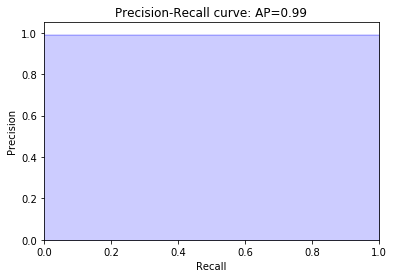

In [40]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [41]:
plt.show()

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_score)

array([[222,   3],
       [  0, 247]])

In [43]:
np.mean(predicted == y_test)  

0.9936440677966102

In [24]:
X_train

,channel,npts,t1,t2_0,t2_1,t2_10,t2_100,t2_1000,t2_10000,t2_10001,...,t2_9990,t2_9991,t2_9992,t2_9993,t2_9994,t2_9995,t2_9996,t2_9997,t2_9998,t2_9999
277,3,30001,"[(-3728556+0j), (35049.14117854361+19524.00708...",89.0,84.0,106.0,-41.0,-16.0,-208.0,-225.0,...,-264.0,-280.0,-286.0,-304.0,-301.0,-261.0,-221.0,-239.0,-281.0,-246.0
608,2,18321,"[(-8274293+0j), (-6821521.920007696+84396.0552...",-484.0,-485.0,-487.0,181.0,-66.0,668107.0,673568.0,...,596256.0,605182.0,613692.0,621777.0,629450.0,636726.0,643632.0,650197.0,656448.0,662409.0
867,1,30001,"[(-4588845+0j), (-299029.5315163296+6159.33620...",-56.0,-122.0,-181.0,-161.0,-178.0,-217.0,-237.0,...,-188.0,-173.0,-200.0,-227.0,-214.0,-201.0,-214.0,-213.0,-178.0,-176.0
1389,2,30001,"[(-4269655+0j), (103979.67353459926-224555.202...",-6.0,-18.0,-90.0,-94.0,-124.0,-351.0,-216.0,...,308.0,324.0,268.0,165.0,48.0,-75.0,-209.0,-338.0,-423.0,-433.0
415,3,20480,"[(-21449717+0j), (8096166.470998177-1275403.70...",-1405.0,-1490.0,-1402.0,-1271.0,-1286.0,60456.0,64608.0,...,27487.0,31154.0,35883.0,40989.0,45760.0,49356.0,51511.0,52932.0,54545.0,57066.0
1314,2,30001,"[(-3818565+0j), (264222.0196729414-29649.53527...",-245.0,-199.0,-25.0,80.0,394.0,78.0,71.0,...,-141.0,-143.0,-152.0,-129.0,-97.0,-66.0,-31.0,0.0,49.0,69.0
958,3,20200,"[(-157540690+0j), (1275499.7555825992+409694.1...",2499.0,2861.0,5730.0,-2903.0,-2694.0,-16206.0,-15751.0,...,-18654.0,-18368.0,-18199.0,-18248.0,-18309.0,-18091.0,-17681.0,-17123.0,-16770.0,-16567.0
983,2,20200,"[(-1113050038+0j), (2042787.5970474647+398878....",-69313.0,-69409.0,-69424.0,-47807.0,-61408.0,-61323.0,-61864.0,...,-60261.0,-60476.0,-60781.0,-60847.0,-60701.0,-60541.0,-60322.0,-60233.0,-60354.0,-60757.0
785,2,30001,"[(-4823004+0j), (322824.5022881476-64587.61691...",-190.0,-191.0,8.0,144.0,28.0,-93.0,-98.0,...,-73.0,-64.0,-56.0,-51.0,-51.0,-67.0,-85.0,-76.0,-77.0,-86.0
874,1,30001,"[(-3615315+0j), (-40538.96190928085+49914.4272...",-134.0,-40.0,-136.0,-103.0,-143.0,-256.0,-246.0,...,-99.0,-65.0,-38.0,-11.0,-31.0,-67.0,-106.0,-129.0,-125.0,-188.0


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [31]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [32]:
predicted=clf.predict(X_test)

In [33]:
clf.score(X_test, y_test)  

0.9936440677966102

In [34]:
predicted

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,

In [35]:
np.mean(predicted == y_test)  

0.9936440677966102

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)


In [37]:
scores

array([0.99050633, 0.99363057, 0.99681529, 0.98407643, 0.98726115])

In [73]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.99 (+/- 0.00)


In [50]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [374]:
gnb.fit(X_train, y_train) 

GaussianNB(priors=None)

In [375]:
predicted = gnb.predict(X_test)

In [376]:
predicted

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0,

In [377]:
np.mean(predicted == y_test)  

1.0

In [382]:
gnb.score(X_test, y_test)  

1.0

In [77]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()
clftree = clftree.fit(X_train, y_train)

In [78]:
treepred=clftree.predict(X_test)

In [79]:
clftree.score(X_test, y_test) 

0.9936575052854123

In [80]:
import graphviz 
dot_data = tree.export_graphviz(clftree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris12") 

'iris12.pdf'

,channel,tsa_0,tsa_1,tsa_2,tsa_3,tsa_4,tsa_5,tsa_6,tsa_7,tsa_8,...,tsa_29991,tsa_29992,tsa_29993,tsa_29994,tsa_29995,tsa_29996,tsa_29997,tsa_29998,tsa_29999,tsa_30000
373,3,-278.0,-261.0,-271.0,-310.0,-306.0,-227.0,-181.0,-237.0,-308.0,...,-21.0,-15.0,1.0,-19.0,-137.0,-251.0,-284.0,-259.0,-202.0,-151.0
710,2,-586.0,-644.0,-703.0,-724.0,-691.0,-638.0,-589.0,-568.0,-572.0,...,31.0,18.0,-23.0,-52.0,-50.0,-57.0,-79.0,-71.0,-43.0,-14.0
290,2,-109.0,-110.0,-106.0,-109.0,-111.0,-113.0,-114.0,-109.0,-108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
730,2,-403.0,-410.0,-410.0,-377.0,-364.0,-375.0,-352.0,-333.0,-347.0,...,-289.0,-286.0,-295.0,-302.0,-334.0,-350.0,-344.0,-344.0,-388.0,-349.0
1249,1,-109.0,-157.0,-154.0,-163.0,-153.0,-96.0,-42.0,29.0,95.0,...,-119.0,-170.0,-212.0,-237.0,-240.0,-246.0,-319.0,-323.0,-238.0,-134.0
286,3,3988.0,3946.0,3915.0,3939.0,3943.0,3944.0,3975.0,3938.0,3853.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284,1,-303.0,-260.0,-199.0,-258.0,-278.0,-311.0,-362.0,-345.0,-279.0,...,-210.0,-240.0,-293.0,-307.0,-259.0,-265.0,-300.0,-232.0,-163.0,-131.0
1346,3,-1405.0,-1490.0,-1522.0,-1434.0,-1359.0,-1331.0,-1321.0,-1313.0,-1345.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489,3,-253.0,-244.0,-371.0,-287.0,-360.0,-460.0,-289.0,-249.0,-393.0,...,4.0,91.0,-9.0,-23.0,-59.0,-91.0,-69.0,-127.0,-9.0,63.0
1106,1,-82.0,-263.0,-392.0,-475.0,-440.0,-270.0,-145.0,-110.0,-61.0,...,-89.0,-272.0,-576.0,-974.0,-1308.0,-1451.0,-1400.0,-1220.0,-902.0,-597.0
